W pracy domowej 2 nale≈ºy wybraƒá jeden z podanych ni≈ºej wariant√≥w:


1. Dla zbioru danych CAR DETAILS (w kaggle bƒôdzie to plik z g√≥ry) spr√≥buj przewidzieƒá cenƒô pojazdu.

Opis zbioru:

_Ten zbi√≥r danych pojazd√≥w, przydatny do przewidywania cen, zawiera informacje o samochodach i motocyklach wymienionych na CarDekho.com. Dane znajdujƒÖ siƒô w pliku CSV, kt√≥ry zawiera nastƒôpujƒÖce kolumny: model, rok, cena sprzeda≈ºy, cena w salonie, przejechane kilometry, rodzaj paliwa, typ sprzedawcy, skrzynia bieg√≥w i liczba poprzednich w≈Ça≈õcicieli._
https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data

2. Dla zbioru danych z opiniami pasa≈ºer√≥w linii lotniczych z for√≥w internetowych zamodeluj satysfakcjƒô klienta.
Zbi√≥r jest ju≈º podzielony na trening i test. 

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=train.csv


Niech rozwiƒÖzanie bƒôdzie:
- autorskie
- opisane
- zawiera≈Ço zastosowanie kilku algorytm√≥w, ich ocenƒô oraz optymalizacjƒô
- wnioski ko≈Ñcowe.

__Termin: 12.06__

Wyniki przez terminem mo≈ºna konsultowaƒá - wystarczy napisaƒá na Slacku:)

# Przewidzywanie cen pojazdu

In [12]:
import pandas as pd

# Wczytanie danych
file_path = 'car_data.csv'
car_data = pd.read_csv(file_path)

# Wy≈õwietlenie pierwszych kilku wierszy danych
car_data.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

**Przeprowadzenie wstƒôpnej analizy danych:**

- Sprawdzenie typ√≥w danych ka≈ºdej kolumny oraz sprawdzenie czy wystƒôpujƒÖ brakujƒÖce warto≈õci.
- Podsumowanie statystyczne danych.
- Analiza unikalnych warto≈õci dla kolumn kategorycznych.

In [13]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
car_data.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

In [15]:
# Analiza unikalnych warto≈õci dla kolumn kategorycznych
unique_car_name = car_data['Car_Name'].unique()
unique_fuel_type = car_data['Fuel_Type'].unique()
unique_seller_type = car_data['Seller_Type'].unique()
unique_transmission = car_data['Transmission'].unique()
unique_owner = car_data['Owner'].unique()
unique_car_name, unique_fuel_type, unique_seller_type, unique_transmission, unique_owner

(array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
        's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
        '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
        'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
        'camry', 'land cruiser', 'Royal Enfield Thunder 500',
        'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
        'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
        'Royal Enfield Thunder 350', 'KTM 390 Duke ',
        'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
        'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
        'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
        'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
        'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
        'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
        'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
        'TVS A

Wstƒôpna analiza danych pokaza≈Ça nastƒôpujƒÖcych informacji:

Zbi√≥r danych zawiera 301 rekordy, a ka≈ºdy rekord ma 9 atrybut√≥w.
Wszystkie rekordy sƒÖ kompletne, nie ma brakujƒÖcych warto≈õci.

**Kolumny to:**
- Car_Name (nazwa samochodu, tekst)
- Year (rok zakupu, liczbowy)
- Selling_Price (cena sprzeda≈ºy, liczbowy)
- Present_Price (obecna cena salonowa, liczbowy)
- Kms_Driven (przebieg w kilometrach, liczbowy)
- Fuel_Type (typ paliwa, kategoria)
- Seller_Type (typ sprzedawcy, kategoria)
- Transmission (typ przek≈Çadni, kategoria)
- Owner (ilo≈õƒá poprzednich w≈Ça≈õcicieli, liczbowy)

**Unikalne warto≈õci dla kolumn kategorycznych:**

- Fuel_Type: ['Petrol', 'Diesel', 'CNG']
- Seller_Type: ['Dealer', 'Individual']
- Transmission: ['Manual', 'Automatic']
- Owner: [0, 1, 3]

**Nastƒôpnie przetwarzanie danych:**

- Kodowanie zmiennych kategorycznych do postaci numerycznej, aby mog≈Çy byƒá u≈ºyte w modelach regresyjnych.
- Dodanie nowej cechy (wiek samochodu = r√≥≈ºnicƒô miƒôdzy obecnym rokiem a rokiem zakupu).

In [16]:
from sklearn.preprocessing import LabelEncoder
import datetime

# Dodanie nowej cechy - wiek samochodu w latach
current_year = datetime.datetime.now().year
car_data['Car_Age'] = current_year - car_data['Year']

# Kodowanie zmiennych kategorycznych
label_encoders = {}
categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission']
for data in categorical_columns:
    le = LabelEncoder()
    car_data[data] = le.fit_transform(car_data[data]) #Fit label encoder and return encoded labels
    label_encoders[data] = le

# PodglƒÖd danych po przekszta≈Çceniach
car_data.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          2   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          2   
3  wagon r  2011           2.85           4.15        5200          2   
4    swift  2014           4.60           6.87       42450          1   

   Seller_Type  Transmission  Owner  Car_Age  
0            0             1      0       10  
1            0             1      0       11  
2            0             1      0        7  
3            0             1      0       13  
4            0             1      0       10

In [17]:
car_data.describe()

Year  Selling_Price  Present_Price     Kms_Driven   Fuel_Type  \
count   301.000000     301.000000     301.000000     301.000000  301.000000   
mean   2013.627907       4.661296       7.628472   36947.205980    1.787375   
std       2.891554       5.082812       8.644115   38886.883882    0.425801   
min    2003.000000       0.100000       0.320000     500.000000    0.000000   
25%    2012.000000       0.900000       1.200000   15000.000000    2.000000   
50%    2014.000000       3.600000       6.400000   32000.000000    2.000000   
75%    2016.000000       6.000000       9.900000   48767.000000    2.000000   
max    2018.000000      35.000000      92.600000  500000.000000    2.000000   

       Seller_Type  Transmission       Owner     Car_Age  
count   301.000000    301.000000  301.000000  301.000000  
mean      0.352159      0.867110    0.043189   10.372093  
std       0.478439      0.340021    0.247915    2.891554  
min       0.000000      0.000000    0.000000    6.000000  
25%       0.000000      1.000000    0.000000    8.000000  
50%       0.000000      1.000000    0.000000   10.000000  
75%       1.000000      1.000000    0.000000   12.000000  
max       1.000000      1.000000    3.000000   21.000000

 Podzia≈Ç danych na zestaw treningowy i testowy

In [18]:
from sklearn.model_selection import train_test_split

# Definicja cech (X) i zmiennej celu (y)
X = car_data.drop(columns=['Car_Name', 'Selling_Price', 'Year'])  # Usuwamy nazwƒô samochodu, rok zakupu jako cechy oraz cenƒô jako zmiennƒÖ celu
y = car_data['Selling_Price']

# Podzia≈Ç danych na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  # 25% danych na zestaw testowy

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((225, 7), (76, 7), (225,), (76,))

Dane zosta≈Çy pomy≈õlnie podzielone na zestaw treningowy i testowy. Zestaw treningowy sk≈Çada siƒô z 225 rekord√≥w, a zestaw testowy z 76 rekord√≥w. Ka≈ºdy zestaw zawiera 7 cech.

## Nastƒôpne kroki
Teraz, gdy dane sƒÖ przygotowane i podzielone, przejdziemy do trenowania r√≥≈ºnych modeli regresji w celu przewidywania ceny sprzeda≈ºy samochod√≥w. Wykorzystamy:

- Regresja liniowa
- Regresja Ridge
- Regresja Lasso
- Drzewo decyzyjne
- Lasy losowe
- Gradient Boosting

Dla ka≈ºdego z tych modeli ocenimy ich skuteczno≈õƒá za pomocƒÖ metryk takich jak RMSE (Root Mean Square Error) oraz R^2 (wsp√≥≈Çczynnik determinacji)

## **Co to jest RMSE** 
- jest miarƒÖ ≈õredniego b≈Çƒôdu kwadratowego miƒôdzy przewidywanymi a rzeczywistymi warto≈õciami. To metryka oceniajƒÖca r√≥≈ºnicƒô miƒôdzy warto≈õciami przewidywanymi przez model a obserwowanymi warto≈õciami, kt√≥re model pr√≥buje przewidzieƒá.
 
 **Jak interpretowaƒá**: Ni≈ºsza warto≈õƒá RMSE wskazuje na lepszƒÖ wydajno≈õƒá modelu

## **Co to jest R^2** 
- jest statystykƒÖ, kt√≥ra mierzy, jak dobrze przysz≈Çe pr√≥bki bƒôdƒÖ przewidywane przez model.

 **Jak interpretowaƒá**: Warto≈õƒá R^2 mie≈õci siƒô zazwyczaj miƒôdzy 0 a 1. Im wy≈ºsza warto≈õƒá R^2, tym lepiej model pasuje do danych


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Przygotowanie modeli z domy≈õlnymi parametrami
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    }

In [21]:
# Funkcja do trenowania i oceny modeli
def train_evaluate(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)  # Trenowanie modelu
        y_pred = model.predict(X_test)  # Predykcja na danych testowych
        # Wykres rozrzutu
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Linia idealna
        plt.xlabel('Rzeczywiste warto≈õci')
        plt.ylabel(f'Przewidywane warto≈õci model:{name}')
        plt.title(f'Wykres rozrzutu przewidywa≈Ñ vs rzeczywiste warto≈õci ({name})')
        plt.show()
        rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Obliczenie RMSE
        r2 = r2_score(y_test, y_pred)  # Obliczenie R^2
        results[name] = {'RMSE': rmse, 'R2': r2}
    return results

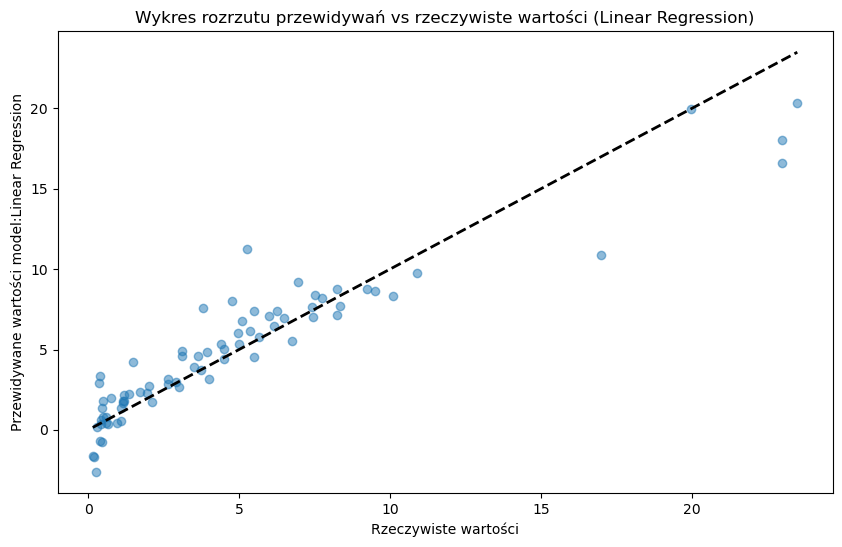

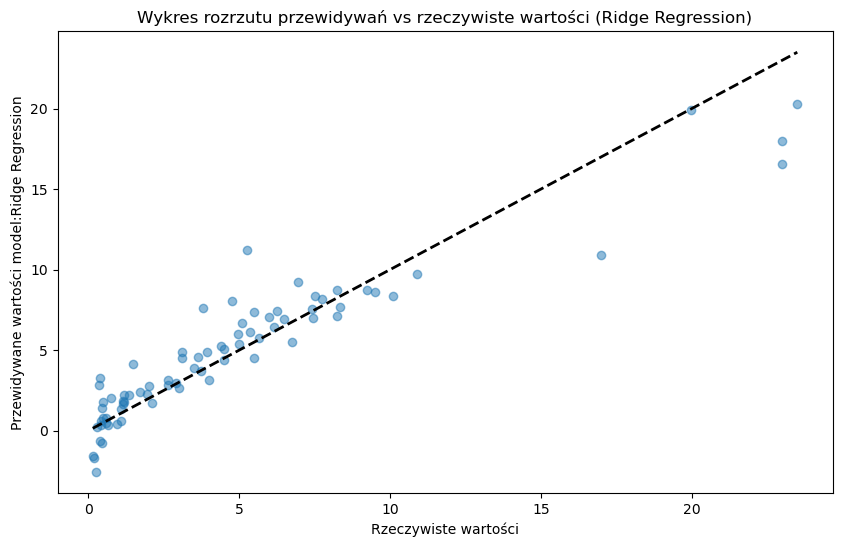

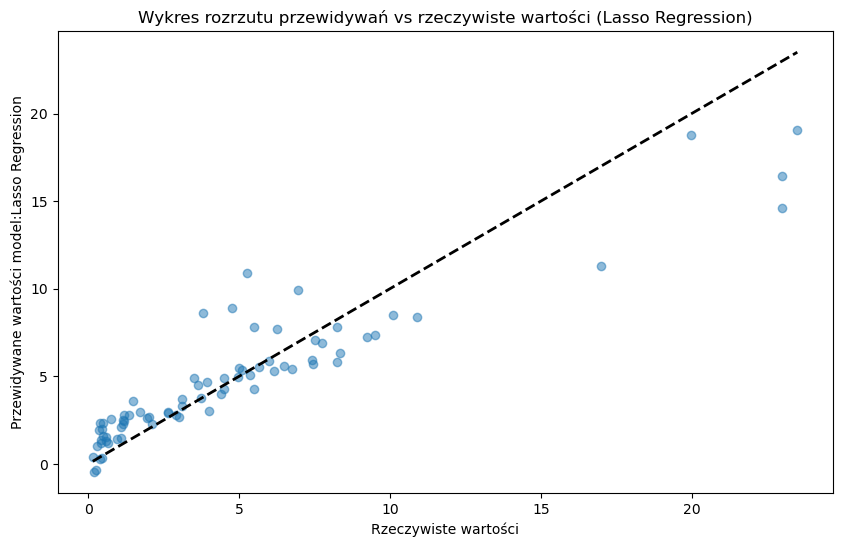

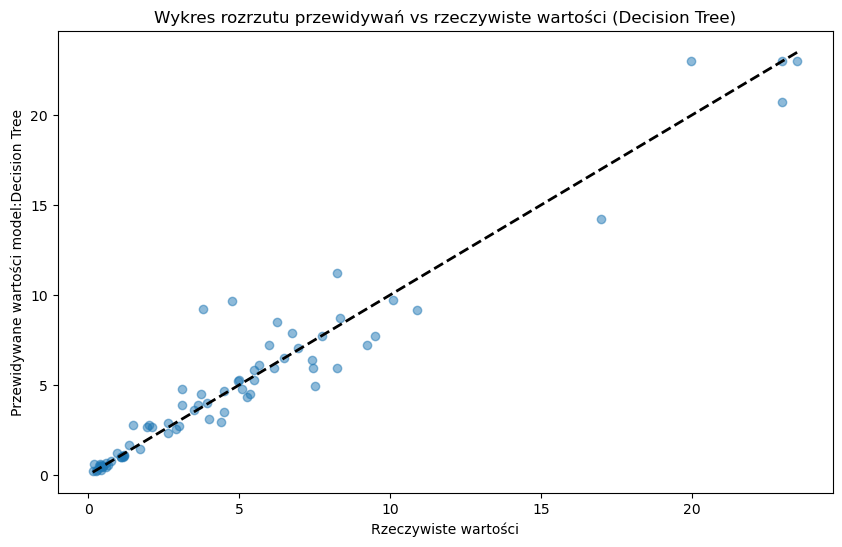

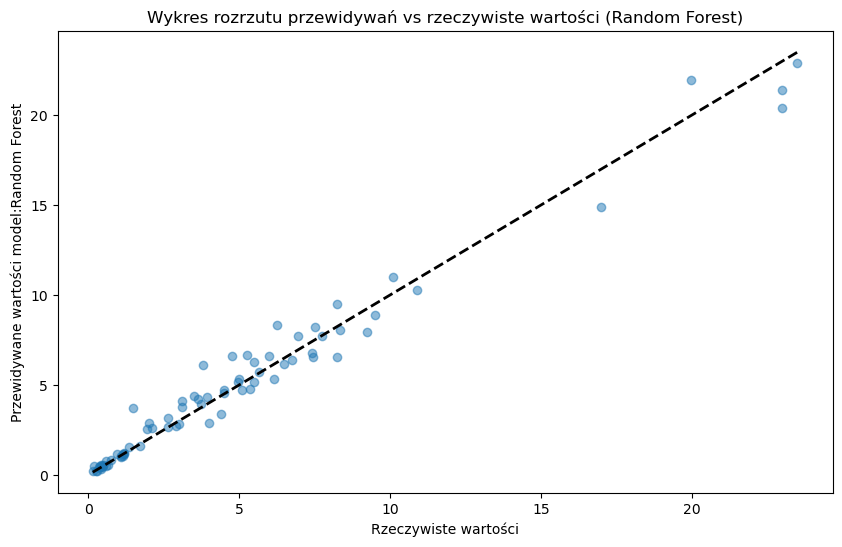

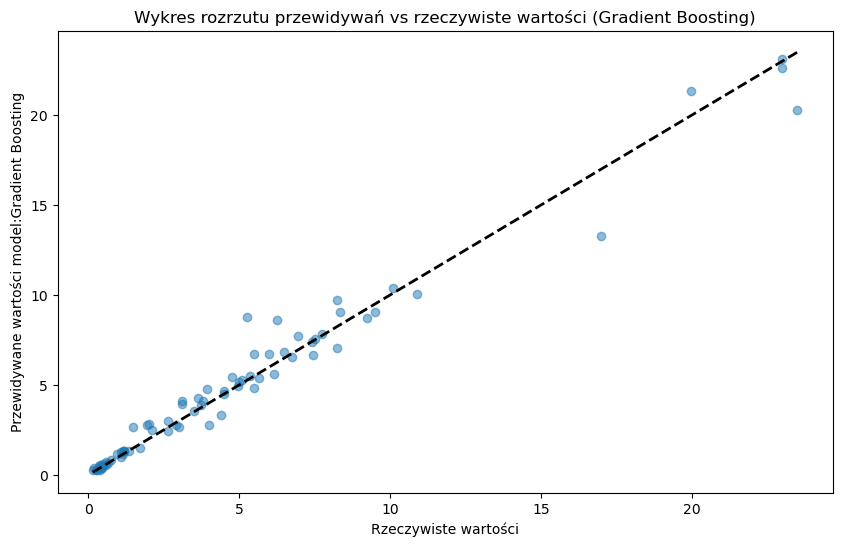

{'Linear Regression': {'RMSE': 1.8524590060934085, 'R2': 0.8750976760292413},
 'Ridge Regression': {'RMSE': 1.8494501960918976, 'R2': 0.8755030854472172},
 'Lasso Regression': {'RMSE': 2.1105180681526687, 'R2': 0.8378744524094422},
 'Decision Tree': {'RMSE': 1.3180587799367756, 'R2': 0.9367671343888637},
 'Random Forest': {'RMSE': 0.8704107681222459, 'R2': 0.972424600227807},
 'Gradient Boosting': {'RMSE': 0.9200123458418595, 'R2': 0.969192204876585}}

In [22]:
results = train_evaluate(models, X_train, y_train, X_test, y_test)
results

In [23]:
df_results = pd.DataFrame(results)
df_results

Linear Regression  Ridge Regression  Lasso Regression  Decision Tree  \
RMSE           1.852459          1.849450          2.110518       1.318059   
R2             0.875098          0.875503          0.837874       0.936767   

      Random Forest  Gradient Boosting  
RMSE       0.870411           0.920012  
R2         0.972425           0.969192

## **Dob√≥r hiperparametr√≥w**

U≈ºycie GridSearchCV do znajdowania najlepszych parametr√≥w dla modeli.

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# Ustawienia dla Ridge Regression
ridge_params = {
    'alpha': [0.1, 1, 10, 100, 1000]  # R√≥≈ºne warto≈õci parametru regularyzacji
}

# Ustawienia dla Lasso Regression
lasso_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]  # R√≥≈ºne warto≈õci parametru regularyzacji
}

# Ustawienia dla Decision Tree
dt_params = {
    'max_depth': [3, 5, 7, 10], # G≈Çƒôboko≈õƒá drzewa
    'min_samples_split': [2, 5, 10], # Minimalna liczba pr√≥bek wymagana do podzia≈Çu wiƒôz≈Ça wewnƒôtrznego
    'min_samples_leaf': [1, 2, 4], # Minimalna liczba pr√≥bek wymagana, aby znajdowaƒá siƒô w wƒôzle li≈õcia
    'max_features': ['sqrt', 'log2', None] # Liczba funkcji, kt√≥re nale≈ºy wziƒÖƒá pod uwagƒô
}

# Ustawienia dla Random Forest
rf_params = {
    'n_estimators': [50, 100, 200, 300],  # Liczba drzew
    'max_features': [None, 'sqrt'],  # Maksymalna liczba cech rozpatrywanych przy podziale
    'max_depth': [3, 5, 7, 10]  # Maksymalna g≈Çƒôboko≈õƒá drzewa
}

# Ustawienia dla Gradient Boosting
gb_params = {
    'n_estimators': [50, 100, 200, 300], 
    'learning_rate': [0.05, 0.1, 0.2], # Szybko≈õƒá uczenia siƒô
    'max_depth': [3, 5, 7] # Liczba etap√≥w wzmacniania do wykonania
}

In [26]:
def tune_hyperparameters(model, params, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error', verbose=1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_, np.sqrt(-grid_search.best_score_)

# Ridge Regression tuning
best_ridge_params, best_ridge_score = tune_hyperparameters(Ridge(), ridge_params, X_train, y_train)
print("Best Ridge params:", best_ridge_params)
print("Best Ridge RMSE:", best_ridge_score)

# Lasso Regression tuning
best_lasso_params, best_lasso_score = tune_hyperparameters(Lasso(), lasso_params, X_train, y_train)
print("Best Lasso params:", best_lasso_params)
print("Best Lasso RMSE:", best_lasso_score)

best_dt_params, best_dt_score = tune_hyperparameters(DecisionTreeRegressor(), dt_params, X_train, y_train)
print("Best Decision Tree params:", best_dt_params)
print("Best Decision Tree RMSE:", best_dt_score)

# Random Forest tuning
best_rf_params, best_rf_score = tune_hyperparameters(RandomForestRegressor(), rf_params, X_train, y_train)
print("Best RF params:", best_rf_params)
print("Best RF RMSE:", best_rf_score)

# Gradient Boosting tuning
best_gb_params, best_gb_score = tune_hyperparameters(GradientBoostingRegressor(), gb_params, X_train, y_train)
print("Best GB params:", best_gb_params)
print("Best GB RMSE:", best_gb_score)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Ridge params: {'alpha': 10}
Best Ridge RMSE: 2.2969058253746417
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Lasso params: {'alpha': 0.01}
Best Lasso RMSE: 2.3157280838850243
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Decision Tree params: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Decision Tree RMSE: 2.1498094783423385
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best RF params: {'max_depth': 10, 'max_features': None, 'n_estimators': 50}
Best RF RMSE: 1.808779877221524
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best GB params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best GB RMSE: 1.7910930623419925


In [27]:
# Strojenie hiperparametr√≥w z uaktualnionymi parametrami
def tune_hyperparameters(model, params, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error', verbose=1, error_score='raise')
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_, np.sqrt(-grid_search.best_score_)

In [28]:
#Przygotowanie modeli z nowymi parametrami
updated_models = {
    "Ridge Regression": Ridge(alpha=0.1),
    "Lasso Regression": Lasso(alpha=0.001),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5),
    "Random Forest": RandomForestRegressor(max_depth=7, max_features=None, n_estimators=50),
    "Gradient Boosting": GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=100),
    }

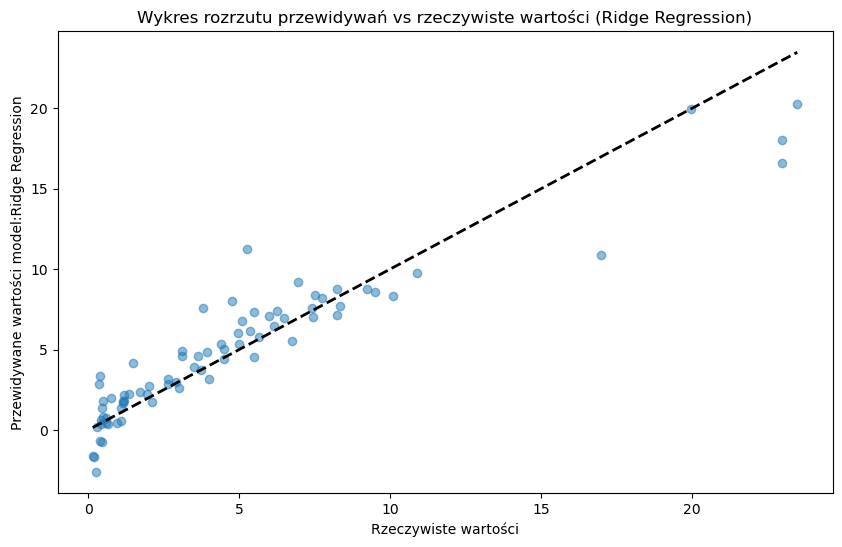

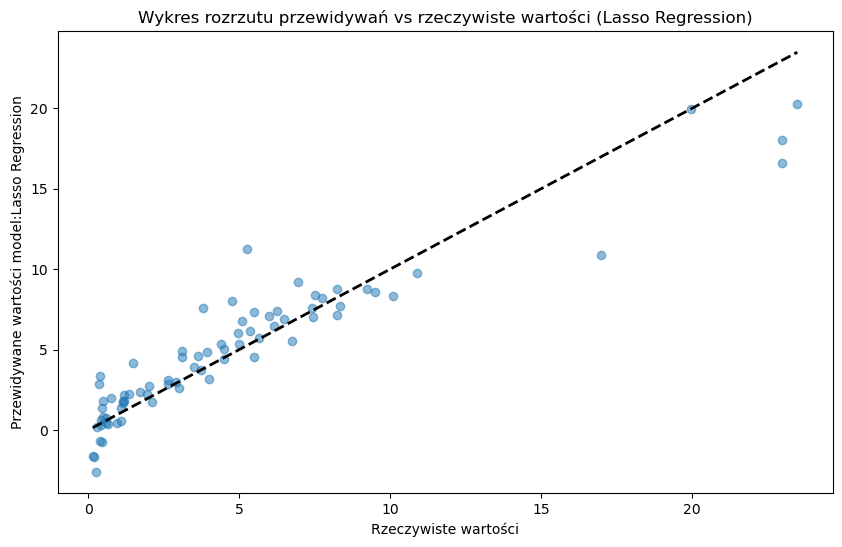

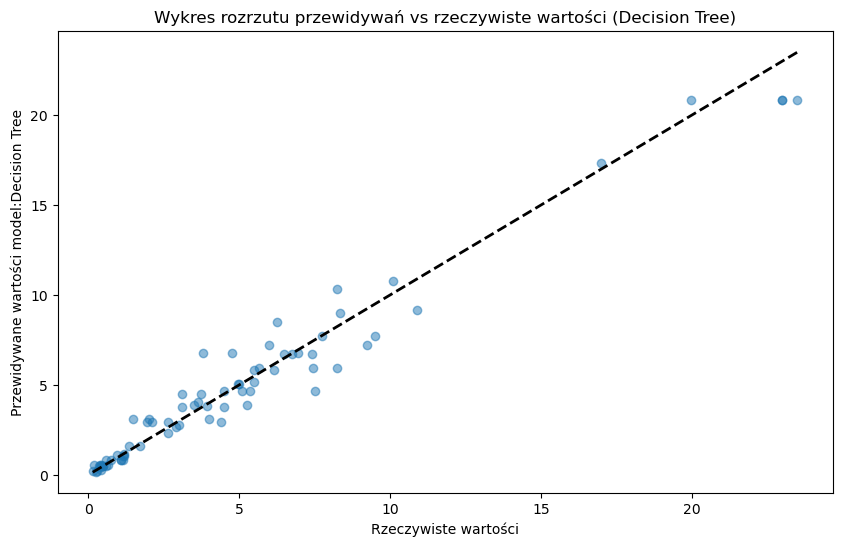

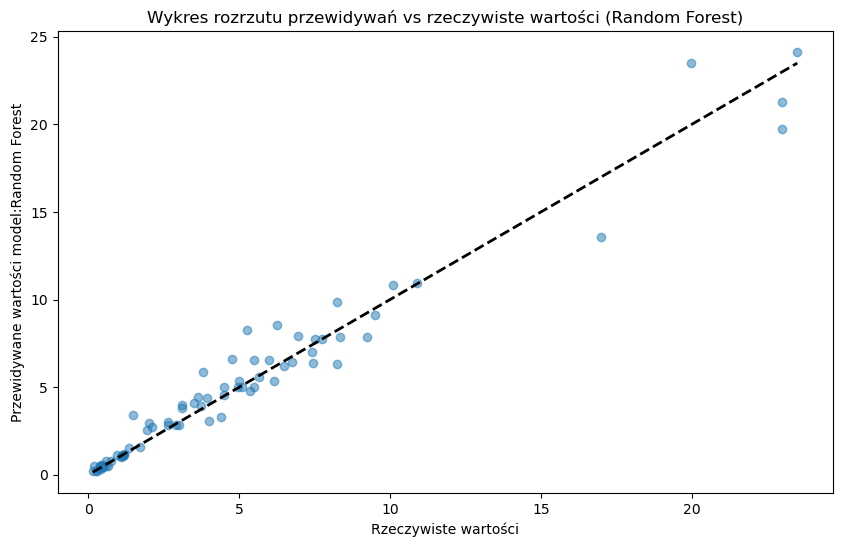

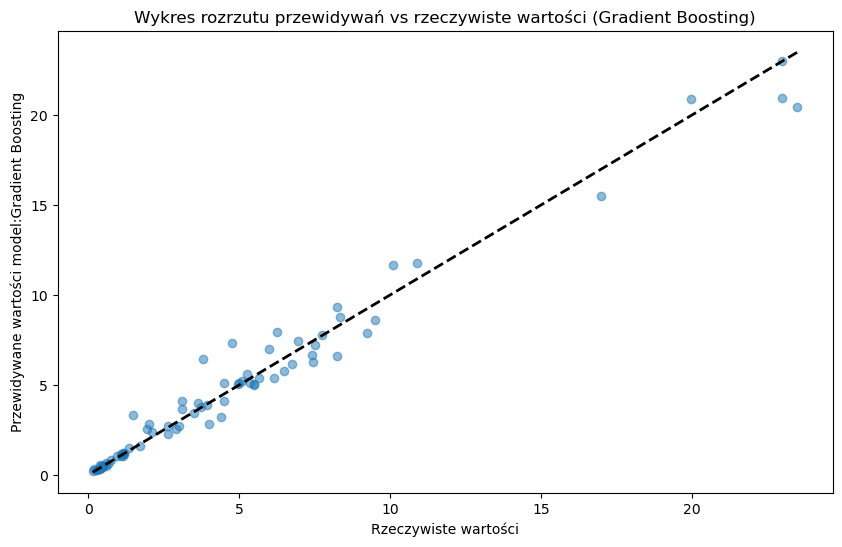

{'Ridge Regression': {'RMSE': 1.8521095762136692, 'R2': 0.8751447923082558},
 'Lasso Regression': {'RMSE': 1.8518226984234163, 'R2': 0.8751834675708439},
 'Decision Tree': {'RMSE': 1.0558361762448054, 'R2': 0.9594242661341817},
 'Random Forest': {'RMSE': 1.058001936958328, 'R2': 0.9592576352485808},
 'Gradient Boosting': {'RMSE': 0.874096833476118, 'R2': 0.9721905499267264}}

In [29]:
updated_results = train_evaluate(updated_models, X_train, y_train, X_test, y_test)
updated_results

In [30]:
df_updated_results = pd.DataFrame(updated_results)
df_updated_results

Ridge Regression  Lasso Regression  Decision Tree  Random Forest  \
RMSE          1.852110          1.851823       1.055836       1.058002   
R2            0.875145          0.875183       0.959424       0.959258   

      Gradient Boosting  
RMSE           0.874097  
R2             0.972191

In [31]:
df_results

Linear Regression  Ridge Regression  Lasso Regression  Decision Tree  \
RMSE           1.852459          1.849450          2.110518       1.318059   
R2             0.875098          0.875503          0.837874       0.936767   

      Random Forest  Gradient Boosting  
RMSE       0.870411           0.920012  
R2         0.972425           0.969192

# Analiza wynik√≥w

AnalizujƒÖc wyniki obu tabel, kt√≥re przedstawiajƒÖ **RMSE** i **R^2** dla r√≥≈ºnych modeli regresyjnych, mo≈ºemy dokonaƒá wyboru najlepszego modelu do przewidywania cen samochod√≥w.

- **Gradient Boosting**
Gradient Boosting osiƒÖgnƒÖ≈Ç najni≈ºsze RMSE (0.874097) i najwy≈ºsze R^2 (0.972191), co wskazuje na bardzo dobrƒÖ zdolno≈õƒá modelu do przewidywania cen z du≈ºƒÖ dok≈Çadno≈õciƒÖ.

- **Random Forest**
Random Forest r√≥wnie≈º wykazuje wysokie warto≈õci R^2 (0.959258) oraz niskie RMSE (1.058002), co pokazuje, ≈ºe jest skutecznym modelem. Ale z domy≈õlnymi ustawieniami ma znacznie ni≈ºsze RMSE (0.87) oraz wy≈ºsze R^2, co mo≈ºe sugerowaƒá pewne przeuczenie lub niewystarczajƒÖce dopasowanie.

- **Desicion Tree**
Decision Tree pokazuje znacznƒÖ poprawƒô w R^2 (0.959424) w stosunku do domy≈õlnych ustawie≈Ñ, co oznacza lepsze dopasowanie modelu do danych po strojeniu.

- **Regresja Liniowa i jej Warianty (Ridge, Lasso)**
Regresja liniowa oraz jej warianty (Ridge i Lasso) osiƒÖgajƒÖ podobne wyniki w obu tabelach, z R^2 oscylujƒÖcym wok√≥≈Ç 0.87. RMSE jest stabilne i nieznacznie r√≥≈ºne pomiƒôdzy modelami.


## Rekomendacje

 **Gradient Boosting**: Jest to zalecany model, je≈ºeli celem jest maksymalizacja dok≈Çadno≈õci przewidywa≈Ñ. Jest najlepszym wyborem w przypadkach, gdzie potrzebna jest wysoka precyzja.
  
 **Desicion Tree**: Mo≈ºe byƒá dobrƒÖ alternatywƒÖ do Gradient Boosting, oferujƒÖc nieco mniejszƒÖ dok≈Çadno≈õƒá, ale nadal bardzo dobre wyniki.

 **Regresje Liniowe (Ridge, Lasso)**: MogƒÖ byƒá wykorzystane, gdy zale≈ºy nam na szybszym przetwarzaniu i mniejszym skomplikowaniu modelu. Ich dodatkowƒÖ zaletƒÖ jest ≈Çatwo≈õƒá interpretacji wynik√≥w.



***Dodatkowo***

Wizualizacje dla Gradient Boosting (wykresy rozrzutu, wa≈ºno≈õƒá cech), aby lepiej zrozumieƒá, jak model radzi sobie z danymi i kt√≥re zmienne majƒÖ najwiƒôksze znaczenie.

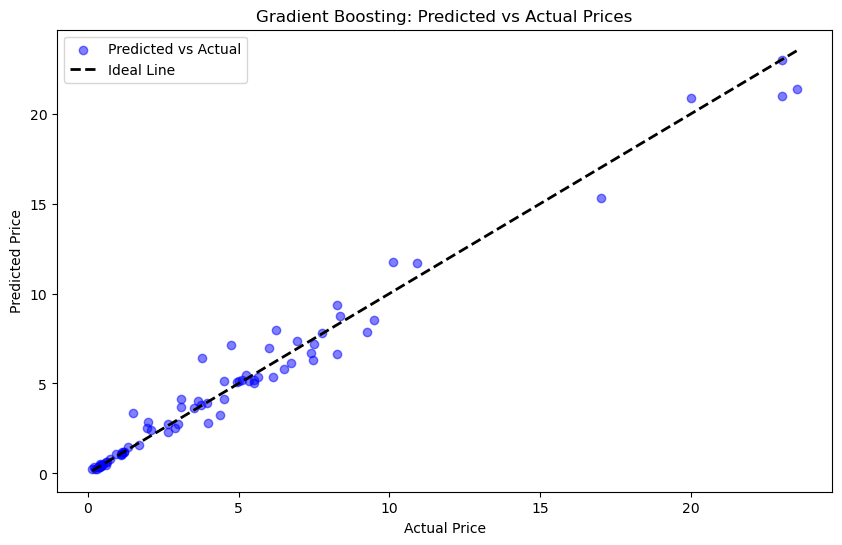

In [32]:
model = GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=100)
model.fit(X_train, y_train)

# Przewidywania modelu
y_pred_gb = model.predict(X_test)

# Tworzenie wykresu rozrzutu
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Gradient Boosting: Predicted vs Actual Prices')
plt.legend()
plt.show()

W kontek≈õcie modelowania cen samochod√≥w, wa≈ºno≈õƒá cech mo≈ºe ujawniƒá, czy cechy takie jak przebieg, wiek pojazdu czy typ paliwa majƒÖ decydujƒÖcy wp≈Çyw na ceny. Informacje te mogƒÖ byƒá wykorzystane do lepszego zrozumienia rynku samochodowego oraz do tworzenia bardziej celowanych strategii cenowych.

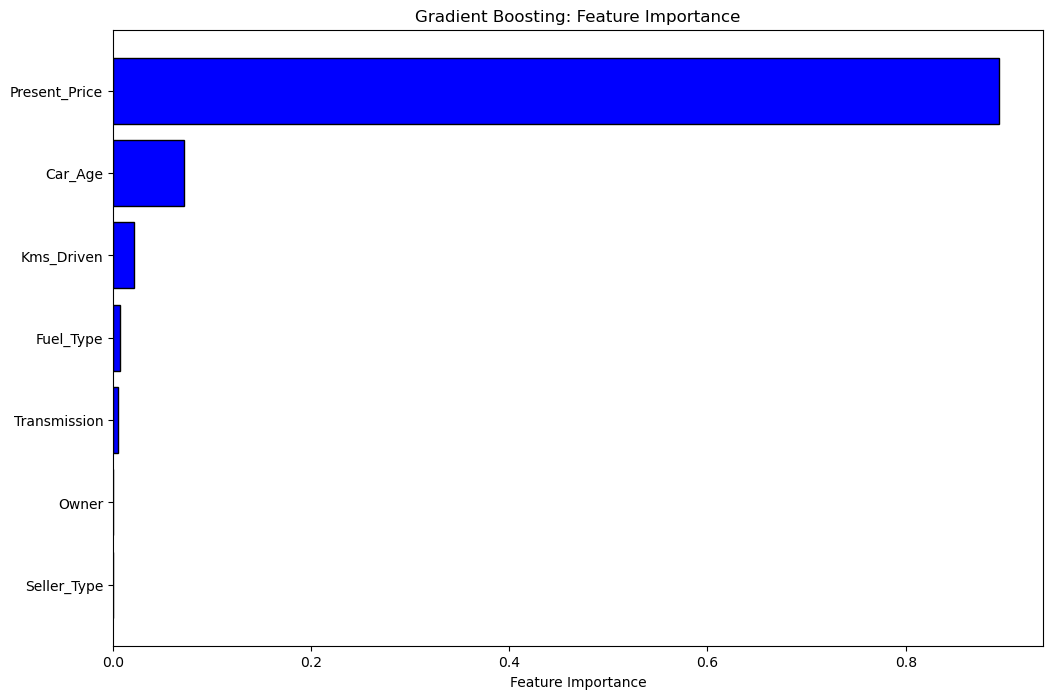

In [33]:
# Wa≈ºno≈õƒá cech
feature_importance_gb = model.feature_importances_

# Sortowanie indeks√≥w cech dla lepszej wizualizacji
sorted_idx_gb = np.argsort(feature_importance_gb)

plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx_gb)), feature_importance_gb[sorted_idx_gb], align='center', color='blue', edgecolor='black')
plt.yticks(range(len(sorted_idx_gb)), np.array(X_test.columns)[sorted_idx_gb])
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting: Feature Importance')
plt.show()

**Praca z ma≈ÇƒÖ ilo≈õciƒÖ danych, jak te 301 rekord√≥w, mo≈ºe sprawiƒá, ≈ºe modele nie bƒôdƒÖ dobrze dzia≈Çaƒá na innych, nowych danych, poniewa≈º sƒÖ zbyt specyficzne dla tych, kt√≥re ju≈º znane.**

 ##### Oto kolejny kotek, choƒá trzeba przyznaƒá, ≈ºe jako pomocnik nie jest zbyt u≈ºyteczny ‚Äì z nim zawsze chce siƒô tylko spaƒá, gdy przychodzi i mruczy.üò∏

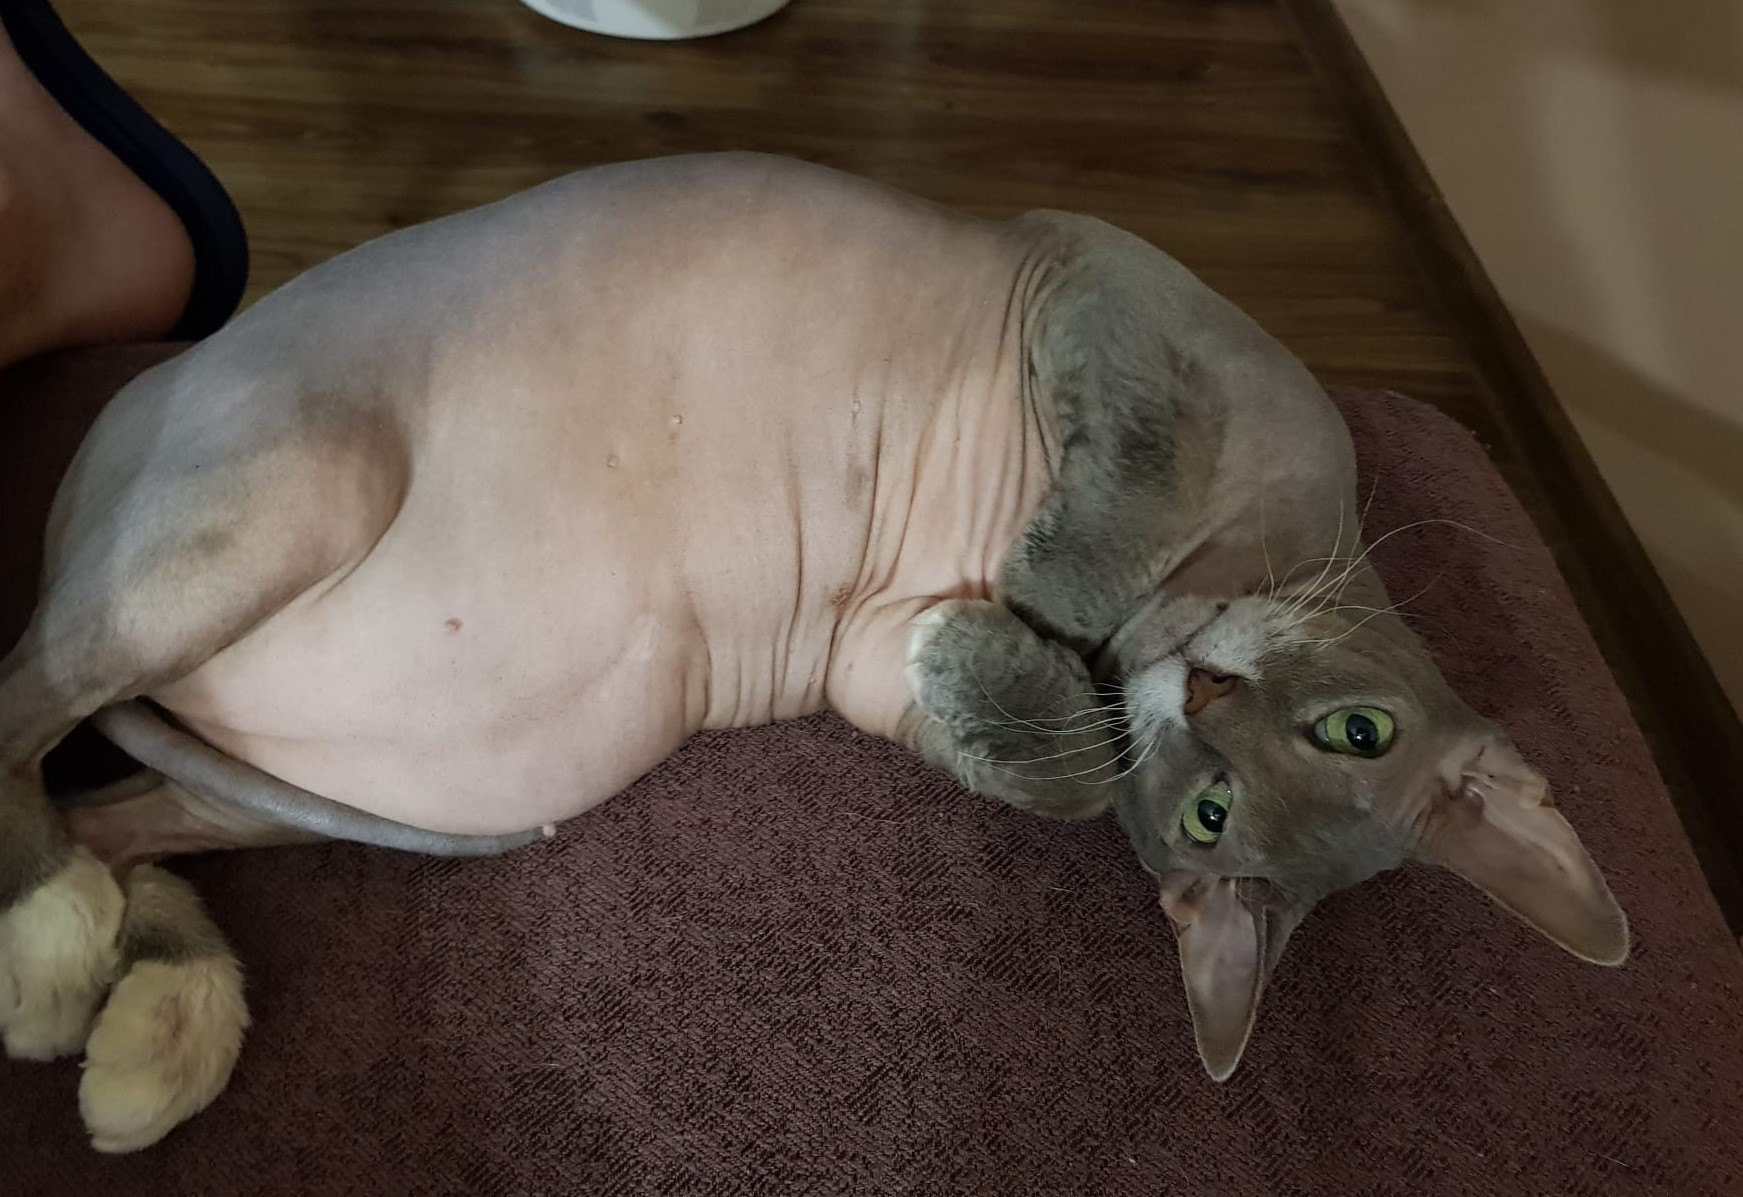

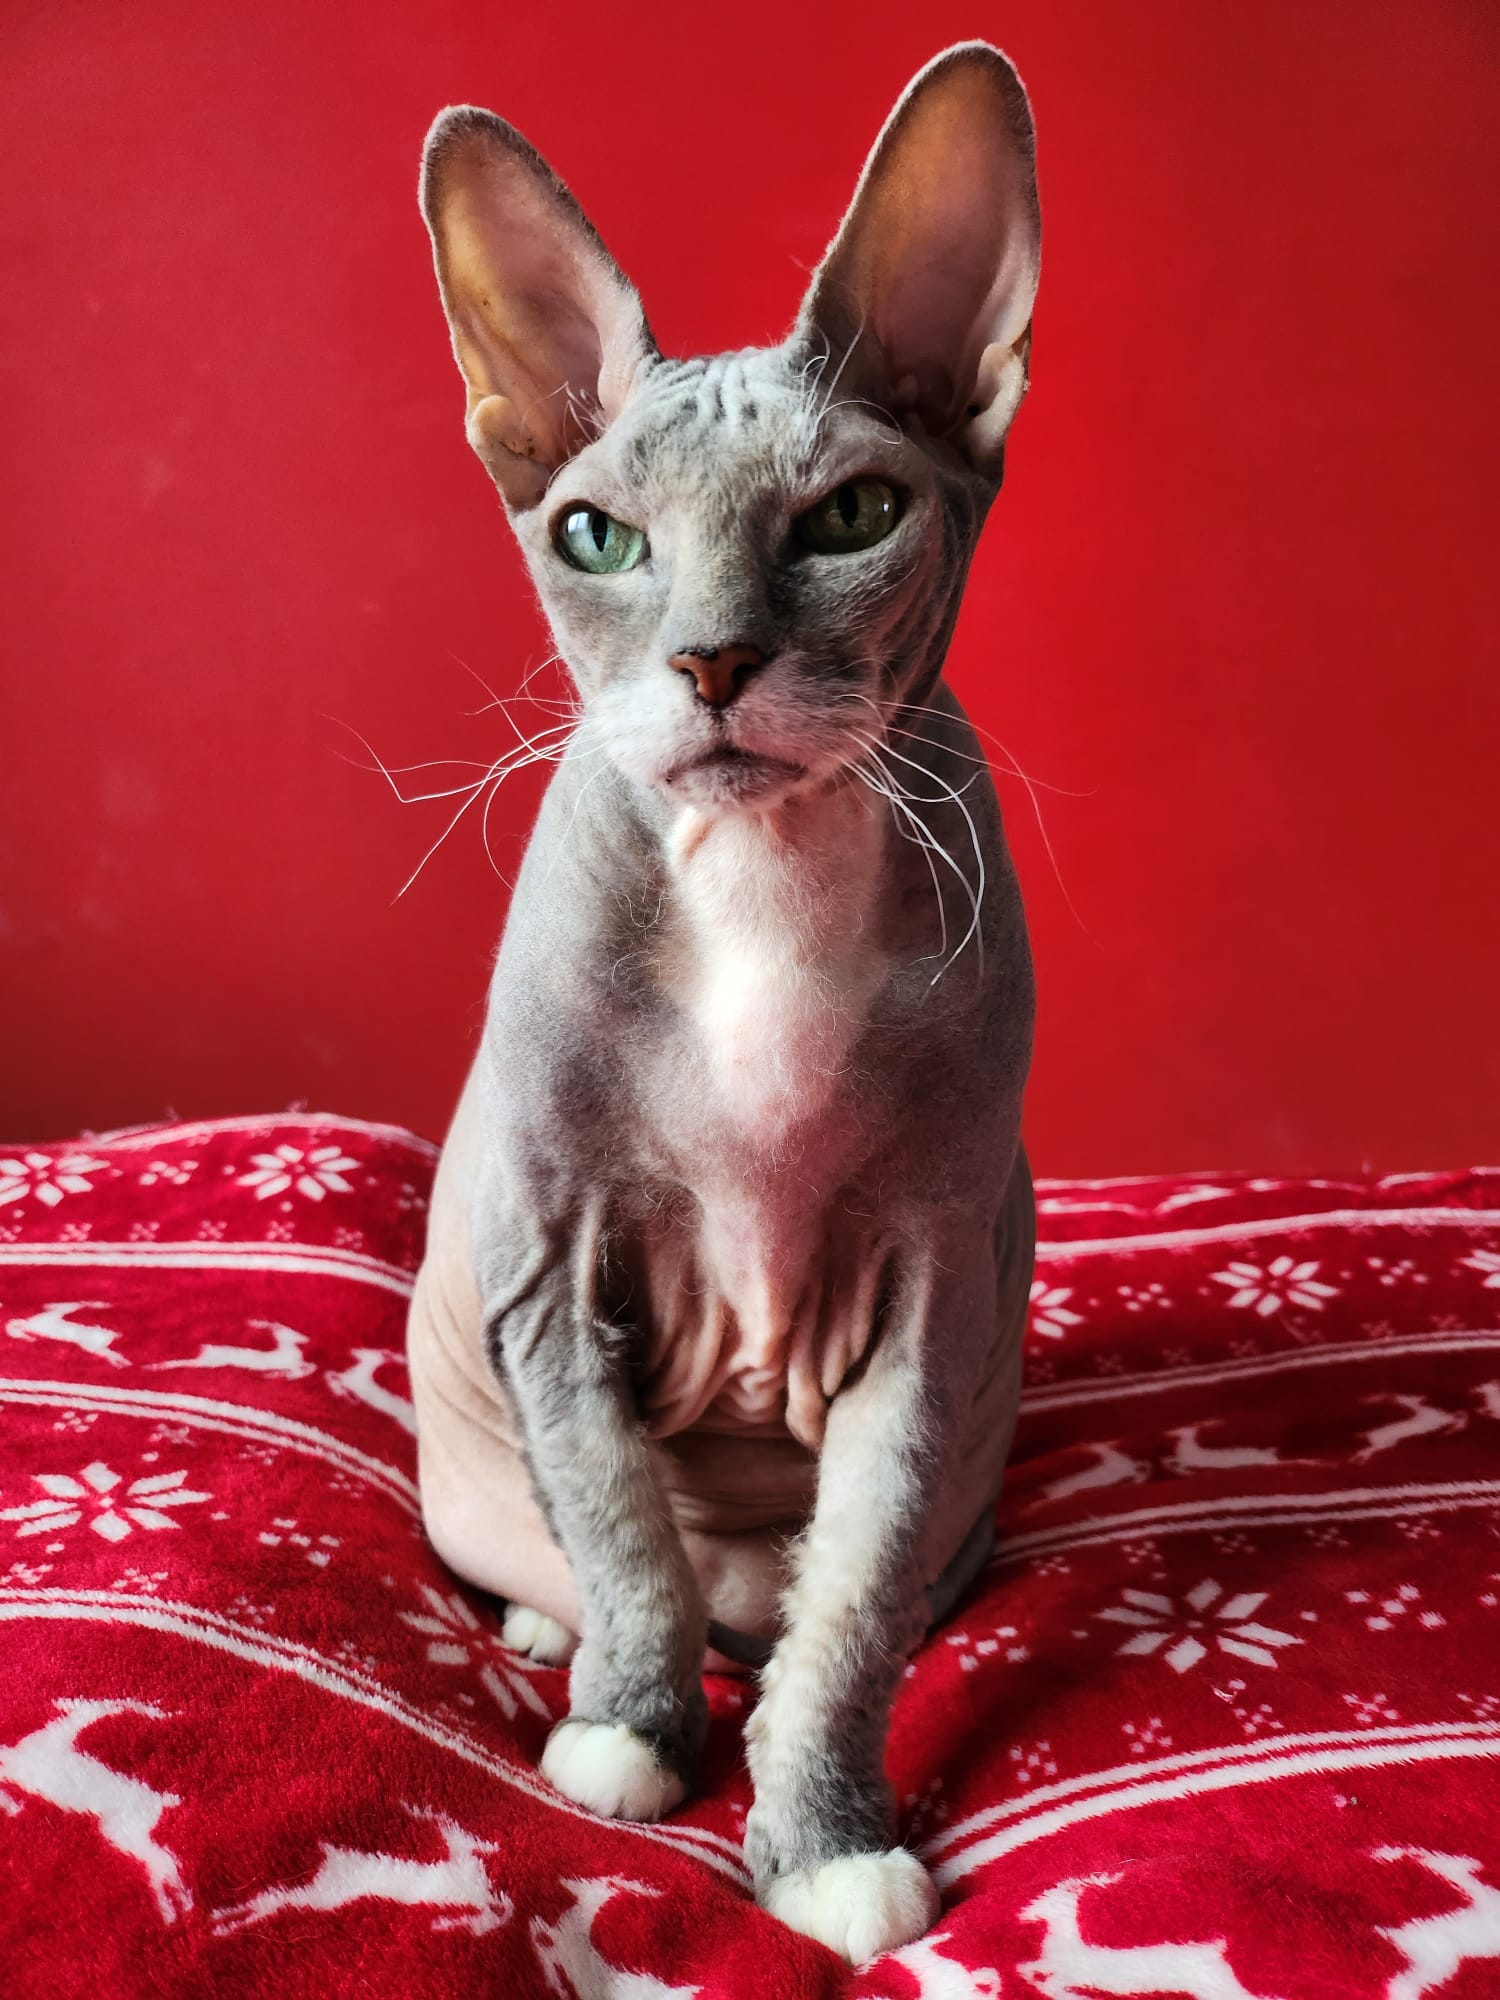